In [327]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 

In [328]:
data = pd.read_csv(r'F:\Github_dsc\Spam_Classifier\dfs\bkp\1.csv')
data.sample(3)

,Unnamed: 0,society_name,property_title,property_rent,types_of_rooms_available,furnishing_details_lst,bedroom_count,bathroom_count,balcony_count,superBuiltUp_area_sqft,...,Posted_By_and_On,Flooring,Floor_Number,Power_Backup,Property_Age,Months_of_Notice,Gated_Community,Electricity_n_Water_Charges,property_features,avg_rating
10,10,"Scheme No 74C, Indore",3 Bedroom House for rent,"₹30,000 /month",NaN,NaN,3 Bedrooms,3 Bathrooms,2 Balconies,NaN,...,"Dealer on Jun 19, 2024",NaN,NaN,NaN,1 to 5 Year Old,0 Months,NaN,Charges not included,NaN,NaN
2,2,ak Houses,2 BHK Flat for rent,"₹16,000 /month",NaN,NaN,2 Bedrooms,2 Bathrooms,No Balcony,NaN,...,"Owner on Jul 01, 2024",NaN,2nd of 3 Floors,NaN,0 to 1 Year Old,0 Months,NaN,Charges not included,NaN,NaN
22,22,Awho Complex,3 BHK Flat for rent,"₹24,500 /month",NaN,NaN,3 Bedrooms,2 Bathrooms,2 Balconies,NaN,...,"Owner on Jul 03, 2024",Others,1st of 10 Floors,Full,5 to 10 Year Old,2 Months,Yes,Charges not included,NaN,4.4


In [329]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   25 non-null     int64  
 1   society_name                 25 non-null     object 
 2   property_title               25 non-null     object 
 3   property_rent                25 non-null     object 
 4   types_of_rooms_available     0 non-null      float64
 5   furnishing_details_lst       0 non-null      float64
 6   bedroom_count                24 non-null     object 
 7   bathroom_count               24 non-null     object 
 8   balcony_count                24 non-null     object 
 9   superBuiltUp_area_sqft       9 non-null      float64
 10  carpet_area_sqft             19 non-null     float64
 11  address_lst                  24 non-null     object 
 12  available_for                24 non-null     object 
 13  furnishing_type       

# data cleaning starts

In [330]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [331]:
data.sample(3)

,society_name,property_title,property_rent,types_of_rooms_available,furnishing_details_lst,bedroom_count,bathroom_count,balcony_count,superBuiltUp_area_sqft,carpet_area_sqft,...,Posted_By_and_On,Flooring,Floor_Number,Power_Backup,Property_Age,Months_of_Notice,Gated_Community,Electricity_n_Water_Charges,property_features,avg_rating
14,Luv Kush Apartments,1 BHK Flat for rent,"₹18,000 /month",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"Bijli Nagar, Bicholi Road",2 Bedroom House for rent,"₹9,000 /month",NaN,NaN,2 Bedrooms,1 Bathroom,No Balcony,NaN,NaN,...,"Owner on Jul 01, 2024",Mosaic,NaN,NaN,5 to 10 Year Old,1 Months,NaN,Charges not included,Water Storage\nPark\nWaste Disposal\nRain Water Harvesting,NaN
21,Sterling Skyline,2 BHK Flat for rent,"₹16,500 /month",NaN,NaN,2 Bedrooms,2 Bathrooms,1 Balcony,NaN,800.0,...,"Owner on Jul 03, 2024",Ceramic,3rd of 9 Floors,NaN,10+ Year Old,1 Months,NaN,Charges not included,NaN,4.0


In [332]:
data['society_name'].value_counts()

society_name
Shree Siddhivinayak Residency    2
Milan Heights                    1
ak Houses                        1
Earthshastra Nariman City        1
Sapphire Avenue                  1
Kalani Nagar, Indore             1
Matrika Casa Greens              1
Divya Vihar                      1
Vijay Nagar                      1
Bijli Nagar, Bicholi Road        1
Scheme No 74C, Indore            1
Mahalaxmi Nagar, Indore          1
Mirchandani Premium Towers       1
Vijay Nagar , Indore             1
Luv Kush Apartments              1
Mirchandani Shalimar Township    1
Premier Towers                   1
SILVER PALACE, Indore            1
Rukhmani Plaza                   1
Shiv Vatika                      1
Man Royal Premium                1
Chandana Apartment               1
Sterling Skyline                 1
Awho Complex                     1
Name: count, dtype: int64

In [333]:
len(data['society_name'])

25

In [334]:
data['society_name'] = data['society_name'].str.lower().str.strip()
data['society_name'] = data['society_name'].apply(lambda x: x+',').str.split(',').str[0].str.strip()


In [335]:
import seaborn as sns 

In [336]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   society_name                 25 non-null     object 
 1   property_title               25 non-null     object 
 2   property_rent                25 non-null     object 
 3   types_of_rooms_available     0 non-null      float64
 4   furnishing_details_lst       0 non-null      float64
 5   bedroom_count                24 non-null     object 
 6   bathroom_count               24 non-null     object 
 7   balcony_count                24 non-null     object 
 8   superBuiltUp_area_sqft       9 non-null      float64
 9   carpet_area_sqft             19 non-null     float64
 10  address_lst                  24 non-null     object 
 11  available_for                24 non-null     object 
 12  furnishing_type              0 non-null      float64
 13  available_from        

In [337]:
data.drop(['furnishing_type', 'furnishing_details_lst', 'types_of_rooms_available'], axis=1, inplace=True)

In [338]:
data.sample(5)

,society_name,property_title,property_rent,bedroom_count,bathroom_count,balcony_count,superBuiltUp_area_sqft,carpet_area_sqft,address_lst,available_for,...,Posted_By_and_On,Flooring,Floor_Number,Power_Backup,Property_Age,Months_of_Notice,Gated_Community,Electricity_n_Water_Charges,property_features,avg_rating
20,chandana apartment,3 BHK Flat for rent,"₹36,000 /month",3 Bedrooms,2 Bathrooms,1 Balcony,1550.0,1200.0,"Chandana Apartment\nNew Palasia, Indore",All,...,"Owner on Jul 03, 2024",NaN,3rd of 5 Floors,NaN,10+ Year Old,0 Months,Yes,Charges not included,Security / Fire Alarm\nLift(s)\nMaintenance Staff\nPark\nVisitor Parking,4.1
6,matrika casa greens,3 BHK Flat for rent,"₹22,000 /month",3 Bedrooms,2 Bathrooms,3 Balconies,1352.0,952.0,"Matrika Casa Greens\nTalawali Chanda, Indore","Family , Bachelors (Women Only)",...,"Owner on Jul 01, 2024",Marble,6th of 6 Floors,Partial,1 to 5 Year Old,0 Months,Yes,Charges not included,Lift(s)\nSwimming Pool\nPark\nInternet/wi-fi connectivity\nShopping Centre\nFitness Centre / GYM\nClub house / Community Center,4.0
0,milan heights,3 BHK Flat for rent,"₹55,000 /month",3 Bedrooms,3 Bathrooms,2 Balconies,1600.0,1500.0,"Milan Heights\nBicholi Mardana, Indore",Family Only,...,"Owner on Jun 18, 2024",Vitrified,8th of 8 Floors,Partial,1 to 5 Year Old,1 Months,Yes,Charges not included,Feng Shui / Vaastu Compliant\nLift(s)\nMaintenance Staff\nSwimming Pool\nPark\nPiped-gas\nSecurity Personnel\nFitness Centre / GYM\nClub house / Community Center\nRain Water Harvesting,4.0
7,vijay nagar,Studio Apartments / 1 RK Flats for rent,"₹10,500 /month",1 Room,1 Bathroom,No Balcony,NaN,450.0,"Vijay Nagar\nScheme No 54 Indore, Indore",Bachelors (Men/Women),...,"Dealer on Jun 26, 2024",NaN,Ground of 0 Floors,NaN,1 to 5 Year Old,0 Months,NaN,Charges included,NaN,4.2
1,earthshastra nariman city,3 BHK Flat for rent,"₹15,000 /month",3 Bedrooms,3 Bathrooms,2 Balconies,1400.0,1000.0,"Earthshastra Nariman City\nSuper Corridor, Indore",All,...,"Owner on Jun 20, 2024",Vitrified,5th of 6 Floors,Full,0 to 1 Year Old,1 Months,Yes,Charges not included,NaN,4.1


In [339]:
data['property_title']

0                          3 BHK Flat for rent
1                          3 BHK Flat for rent
2                          2 BHK Flat for rent
3                          2 BHK Flat for rent
4                          2 BHK Flat for rent
5                     3 Bedroom House for rent
6                          3 BHK Flat for rent
7      Studio Apartments / 1 RK Flats for rent
8                     2 Bedroom House for rent
9     1 BHK Independent Builder Floor for rent
10                    3 Bedroom House for rent
11                         3 BHK Flat for rent
12                         3 BHK Flat for rent
13                    3 Bedroom House for rent
14                         1 BHK Flat for rent
15                         2 BHK Flat for rent
16                    4 Bedroom House for rent
17                         3 BHK Flat for rent
18                         2 BHK Flat for rent
19                         2 BHK Flat for rent
20                         3 BHK Flat for rent
21           

In [340]:
data['address_lst']

0                        Milan Heights\nBicholi Mardana, Indore
1             Earthshastra Nariman City\nSuper Corridor, Indore
2                                    ak Houses\nChhawni, Indore
3                                Divya Vihar\nBhawrasla, Indore
4                              Sapphire Avenue\nMG Road, Indore
5                                          Kalani Nagar, Indore
6                  Matrika Casa Greens\nTalawali Chanda, Indore
7                      Vijay Nagar\nScheme No 54 Indore, Indore
8                Bijli Nagar, Bicholi Road\nBijli Nagar, Indore
9                                       Mahalaxmi Nagar, Indore
10                                        Scheme No 74C, Indore
11       Mirchandani Shalimar Township\nAB Road indore , Indore
12          Mirchandani Premium Towers\nAB Road indore , Indore
13                                         Vijay Nagar , Indore
14                                                          NaN
15                    Premier Towers\nSh

In [341]:
data['address_lst'] = data['address_lst'].str.replace('\n', ',').str.split(',').str[1:-1].str[0]

In [342]:
data.rename(columns={'address_lst': 'area'}, inplace=True)

In [343]:
data['area'] = data['area'].str.lower().str.strip()

In [344]:
data['area'].value_counts()

area
bicholi mardana        2
ab road indore         2
vijay nagar            2
super corridor         1
mg road                1
talawali chanda        1
chhawni                1
bhawrasla              1
bicholi road           1
scheme no 54 indore    1
mr 11                  1
shalimar township      1
rukhmani plaza         1
new palasia            1
hukma khedi            1
lig square             1
Name: count, dtype: int64

In [345]:
data.sample(5)

,society_name,property_title,property_rent,bedroom_count,bathroom_count,balcony_count,superBuiltUp_area_sqft,carpet_area_sqft,area,available_for,...,Posted_By_and_On,Flooring,Floor_Number,Power_Backup,Property_Age,Months_of_Notice,Gated_Community,Electricity_n_Water_Charges,property_features,avg_rating
7,vijay nagar,Studio Apartments / 1 RK Flats for rent,"₹10,500 /month",1 Room,1 Bathroom,No Balcony,NaN,450.0,scheme no 54 indore,Bachelors (Men/Women),...,"Dealer on Jun 26, 2024",NaN,Ground of 0 Floors,NaN,1 to 5 Year Old,0 Months,NaN,Charges included,NaN,4.2
5,kalani nagar,3 Bedroom House for rent,"₹22,000 /month",3 Bedrooms,3 Bathrooms,2 Balconies,NaN,NaN,NaN,Family Only,...,"Owner on Jun 30, 2024",NaN,NaN,NaN,1 to 5 Year Old,1 Months,NaN,Charges not included,Private Garden / Terrace\nWater Storage\nVisitor Parking,3.9
1,earthshastra nariman city,3 BHK Flat for rent,"₹15,000 /month",3 Bedrooms,3 Bathrooms,2 Balconies,1400.0,1000.0,super corridor,All,...,"Owner on Jun 20, 2024",Vitrified,5th of 6 Floors,Full,0 to 1 Year Old,1 Months,Yes,Charges not included,NaN,4.1
21,sterling skyline,2 BHK Flat for rent,"₹16,500 /month",2 Bedrooms,2 Bathrooms,1 Balcony,NaN,800.0,bicholi mardana,Family Only,...,"Owner on Jul 03, 2024",Ceramic,3rd of 9 Floors,NaN,10+ Year Old,1 Months,NaN,Charges not included,NaN,4.0
8,bijli nagar,2 Bedroom House for rent,"₹9,000 /month",2 Bedrooms,1 Bathroom,No Balcony,NaN,NaN,bicholi road,Bachelors (Women Only),...,"Owner on Jul 01, 2024",Mosaic,NaN,NaN,5 to 10 Year Old,1 Months,NaN,Charges not included,Water Storage\nPark\nWaste Disposal\nRain Water Harvesting,NaN


In [346]:
pd.set_option('display.max_colwidth', 1000)

In [347]:
data['property_features'] = data['property_features'].str.replace('\n', '/').str.split('/')

In [348]:
data['property_features']

0                                                                                                                           [Feng Shui ,  Vaastu Compliant, Lift(s), Maintenance Staff, Swimming Pool, Park, Piped-gas, Security Personnel, Fitness Centre ,  GYM, Club house ,  Community Center, Rain Water Harvesting]
1                                                                                                                                                                                                                                                                                                                     NaN
2                                                                                                                                                                                                                                                                                                                     NaN
3                                                         

In [349]:
data['property_features'].fillna(' ')

0                                                                                                                           [Feng Shui ,  Vaastu Compliant, Lift(s), Maintenance Staff, Swimming Pool, Park, Piped-gas, Security Personnel, Fitness Centre ,  GYM, Club house ,  Community Center, Rain Water Harvesting]
1                                                                                                                                                                                                                                                                                                                        
2                                                                                                                                                                                                                                                                                                                        
3                                                         

In [350]:
all_features=[]
for row in data['property_features'].fillna(' '):
    for feature in list(row):
        all_features.append(feature.lower().strip())
print(all_features)
print(len(all_features))

['feng shui', 'vaastu compliant', 'lift(s)', 'maintenance staff', 'swimming pool', 'park', 'piped-gas', 'security personnel', 'fitness centre', 'gym', 'club house', 'community center', 'rain water harvesting', '', '', '', 'feng shui', 'vaastu compliant', 'security', 'fire alarm', 'lift(s)', 'maintenance staff', 'park', 'visitor parking', 'private garden', 'terrace', 'water storage', 'visitor parking', 'lift(s)', 'swimming pool', 'park', 'internet', 'wi-fi connectivity', 'shopping centre', 'fitness centre', 'gym', 'club house', 'community center', '', 'water storage', 'park', 'waste disposal', 'rain water harvesting', '', '', 'lift(s)', 'swimming pool', 'piped-gas', 'natural light', 'shopping centre', 'fitness centre', 'gym', 'club house', 'community center', 'intercom facility', 'lift(s)', 'maintenance staff', 'swimming pool', 'park', 'visitor parking', 'natural light', 'airy rooms', 'shopping centre', 'fitness centre', 'gym', 'club house', 'community center', 'private garden', 'terrac

In [351]:
pd.DataFrame({'features':all_features}).value_counts(dropna=True).sort_values(ascending=True)

features             
wi-fi connectivity        1
spacious interiors        1
airy rooms                1
water softening plant     1
waste disposal            1
internet                  1
intercom facility         2
terrace                   2
security personnel        2
private garden            2
natural light             3
piped-gas                 3
rain water harvesting     3
feng shui                 4
shopping centre           4
water storage             4
vaastu compliant          4
security                  4
fire alarm                4
fitness centre            5
gym                       5
community center          5
maintenance staff         5
club house                5
swimming pool             5
visitor parking           6
lift(s)                   7
park                      9
                         13
Name: count, dtype: int64

In [352]:
data.sample(5)

,society_name,property_title,property_rent,bedroom_count,bathroom_count,balcony_count,superBuiltUp_area_sqft,carpet_area_sqft,area,available_for,...,Posted_By_and_On,Flooring,Floor_Number,Power_Backup,Property_Age,Months_of_Notice,Gated_Community,Electricity_n_Water_Charges,property_features,avg_rating
19,man royal premium,2 BHK Flat for rent,"₹23,000 /month",2 Bedrooms,2 Bathrooms,2 Balconies,1150.0,865.0,vijay nagar,Family Only,...,"Owner on Jul 03, 2024",NaN,4th of 6 Floors,NaN,10+ Year Old,1 Months,NaN,Charges not included,NaN,3.8
10,scheme no 74c,3 Bedroom House for rent,"₹30,000 /month",3 Bedrooms,3 Bathrooms,2 Balconies,NaN,NaN,NaN,All,...,"Dealer on Jun 19, 2024",NaN,NaN,NaN,1 to 5 Year Old,0 Months,NaN,Charges not included,NaN,NaN
8,bijli nagar,2 Bedroom House for rent,"₹9,000 /month",2 Bedrooms,1 Bathroom,No Balcony,NaN,NaN,bicholi road,Bachelors (Women Only),...,"Owner on Jul 01, 2024",Mosaic,NaN,NaN,5 to 10 Year Old,1 Months,NaN,Charges not included,"[Water Storage, Park, Waste Disposal, Rain Water Harvesting]",NaN
14,luv kush apartments,1 BHK Flat for rent,"₹18,000 /month",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,shiv vatika,3 BHK Flat for rent,"₹24,000 /month",3 Bedrooms,2 Bathrooms,2 Balconies,NaN,1100.0,mr 11,All,...,"Owner on Jul 04, 2024",Vitrified,6th of 6 Floors,NaN,0 to 1 Year Old,1 Months,NaN,Charges not included,"[Feng Shui , Vaastu Compliant, Security , Fire Alarm, Lift(s), Park, Visitor Parking]",NaN


In [353]:
# dig out the story including all the features by performing eDA 
# ie. univariatea biavariate and multivariate analysis

In [354]:
data['available_for'].str.strip().str.lower().fillna('').str.find('family')

0     0
1    -1
2    -1
3     0
4    -1
5     0
6     0
7    -1
8    -1
9    -1
10   -1
11   -1
12   -1
13    0
14   -1
15   -1
16   -1
17   -1
18    0
19    0
20   -1
21    0
22    0
23   -1
24   -1
Name: available_for, dtype: int64

In [355]:
family = []
for i in data['available_for'].str.strip().str.lower().str.find('family').to_list():
    if i==-1:
        family.append(0)
    else:
        family.append(1)
data['available_for_family'] = pd.Series(family)
data['available_for_family']

0     1
1     0
2     0
3     1
4     0
5     1
6     1
7     0
8     0
9     0
10    0
11    0
12    0
13    1
14    1
15    0
16    0
17    0
18    1
19    1
20    0
21    1
22    1
23    0
24    0
Name: available_for_family, dtype: int64

In [356]:
data['available_for'].fillna('').str.strip().str.lower().str.replace('women', '').str.find('men')

0     -1
1     -1
2     -1
3     -1
4     -1
5     -1
6     -1
7     11
8     -1
9     -1
10    -1
11    -1
12    -1
13    20
14    -1
15    -1
16    -1
17    -1
18    -1
19    -1
20    -1
21    -1
22    -1
23    -1
24    -1
Name: available_for, dtype: int64

In [357]:
bachelor_men=[]
for i in data['available_for'].fillna('').str.strip().str.lower().str.replace('women', '').str.find('men').to_list():
    if i==-1:
        bachelor_men.append(0)
    else:
        bachelor_men.append(1)
data['available_for_bachelor_men'] = pd.Series(bachelor_men)
data['available_for_bachelor_men'] 

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     1
8     0
9     0
10    0
11    0
12    0
13    1
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
Name: available_for_bachelor_men, dtype: int64

In [358]:
data.sample(3)

,society_name,property_title,property_rent,bedroom_count,bathroom_count,balcony_count,superBuiltUp_area_sqft,carpet_area_sqft,area,available_for,...,Floor_Number,Power_Backup,Property_Age,Months_of_Notice,Gated_Community,Electricity_n_Water_Charges,property_features,avg_rating,available_for_family,available_for_bachelor_men
19,man royal premium,2 BHK Flat for rent,"₹23,000 /month",2 Bedrooms,2 Bathrooms,2 Balconies,1150.0,865.0,vijay nagar,Family Only,...,4th of 6 Floors,NaN,10+ Year Old,1 Months,NaN,Charges not included,NaN,3.8,1,0
8,bijli nagar,2 Bedroom House for rent,"₹9,000 /month",2 Bedrooms,1 Bathroom,No Balcony,NaN,NaN,bicholi road,Bachelors (Women Only),...,NaN,NaN,5 to 10 Year Old,1 Months,NaN,Charges not included,"[Water Storage, Park, Waste Disposal, Rain Water Harvesting]",NaN,0,0
18,rukhmani plaza,2 BHK Flat for rent,"₹25,000 /month",2 Bedrooms,2 Bathrooms,2 Balconies,NaN,1149.0,rukhmani plaza,"Family , Bachelors (Women Only)",...,1st of 5 Floors,Partial,10+ Year Old,3 Months,Yes,Charges not included,NaN,NaN,1,0


In [359]:
data['available_for']

0                         Family Only
1                                 All
2                                 All
3                         Family Only
4                                 All
5                         Family Only
6     Family , Bachelors (Women Only)
7               Bachelors (Men/Women)
8              Bachelors (Women Only)
9                                 All
10                                All
11                                All
12                                All
13      Family , Bachelors (Men Only)
14                                NaN
15                                All
16                                All
17                                All
18    Family , Bachelors (Women Only)
19                        Family Only
20                                All
21                        Family Only
22                        Family Only
23                                All
24                                All
Name: available_for, dtype: object

In [360]:
data['available_for'].fillna('').str.strip().str.lower().str.find('women').to_list()

[-1,
 -1,
 -1,
 -1,
 -1,
 -1,
 20,
 15,
 11,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 20,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1]

In [361]:
bachelor_women=[]
for i in data['available_for'].fillna('').str.strip().str.lower().str.find('women').to_list():
    if i==-1:
        bachelor_women.append(0)
    else:
        bachelor_women.append(1)
data['available_for_bachelor_women'] = pd.Series(bachelor_women)
data['available_for_bachelor_women'] 

0     0
1     0
2     0
3     0
4     0
5     0
6     1
7     1
8     1
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    1
19    0
20    0
21    0
22    0
23    0
24    0
Name: available_for_bachelor_women, dtype: int64

In [362]:
data['available_for']

0                         Family Only
1                                 All
2                                 All
3                         Family Only
4                                 All
5                         Family Only
6     Family , Bachelors (Women Only)
7               Bachelors (Men/Women)
8              Bachelors (Women Only)
9                                 All
10                                All
11                                All
12                                All
13      Family , Bachelors (Men Only)
14                                NaN
15                                All
16                                All
17                                All
18    Family , Bachelors (Women Only)
19                        Family Only
20                                All
21                        Family Only
22                        Family Only
23                                All
24                                All
Name: available_for, dtype: object

In [363]:
available_for_all=[]
for i in data['available_for'].fillna('').str.strip().str.lower().str.find('all').to_list():
    if i==-1:
        available_for_all.append(0)
    else:
        available_for_all.append(1)
available_for_all

data['available_for_family'] = data['available_for_family']+available_for_all
data['available_for_bachelor_men'] = data['available_for_bachelor_men']+available_for_all
data['available_for_bachelor_women'] = data['available_for_bachelor_women']+available_for_all

In [364]:
data.sample(3)

,society_name,property_title,property_rent,bedroom_count,bathroom_count,balcony_count,superBuiltUp_area_sqft,carpet_area_sqft,area,available_for,...,Power_Backup,Property_Age,Months_of_Notice,Gated_Community,Electricity_n_Water_Charges,property_features,avg_rating,available_for_family,available_for_bachelor_men,available_for_bachelor_women
3,divya vihar,2 BHK Flat for rent,"₹12,000 /month",2 Bedrooms,2 Bathrooms,2 Balconies,NaN,1000.0,bhawrasla,Family Only,...,NaN,1 to 5 Year Old,0 Months,Yes,Charges not included,NaN,3.8,1,0,0
7,vijay nagar,Studio Apartments / 1 RK Flats for rent,"₹10,500 /month",1 Room,1 Bathroom,No Balcony,NaN,450.0,scheme no 54 indore,Bachelors (Men/Women),...,NaN,1 to 5 Year Old,0 Months,NaN,Charges included,NaN,4.2,0,1,1
18,rukhmani plaza,2 BHK Flat for rent,"₹25,000 /month",2 Bedrooms,2 Bathrooms,2 Balconies,NaN,1149.0,rukhmani plaza,"Family , Bachelors (Women Only)",...,Partial,10+ Year Old,3 Months,Yes,Charges not included,NaN,NaN,1,0,1


In [365]:
data['avg_rating'], data['avg_rating'].mean()

(0     4.0
 1     4.1
 2     NaN
 3     3.8
 4     NaN
 5     3.9
 6     4.0
 7     4.2
 8     NaN
 9     4.3
 10    NaN
 11    4.3
 12    4.3
 13    4.4
 14    NaN
 15    4.0
 16    NaN
 17    NaN
 18    NaN
 19    3.8
 20    4.1
 21    4.0
 22    4.4
 23    NaN
 24    NaN
 Name: avg_rating, dtype: float64,
 np.float64(4.1066666666666665))

In [366]:
data['avg_rating'] = data['avg_rating'].fillna(data['avg_rating'].mean())

In [367]:
data.sample(3)

,society_name,property_title,property_rent,bedroom_count,bathroom_count,balcony_count,superBuiltUp_area_sqft,carpet_area_sqft,area,available_for,...,Power_Backup,Property_Age,Months_of_Notice,Gated_Community,Electricity_n_Water_Charges,property_features,avg_rating,available_for_family,available_for_bachelor_men,available_for_bachelor_women
4,sapphire avenue,2 BHK Flat for rent,"₹35,000 /month",2 Bedrooms,2 Bathrooms,2 Balconies,1500.0,1100.0,mg road,All,...,Full,0 to 1 Year Old,1 Months,Yes,Charges not included,"[Feng Shui , Vaastu Compliant, Security , Fire Alarm, Lift(s), Maintenance Staff, Park, Visitor Parking]",4.106667,1,1,1
24,shree siddhivinayak residency,1 BHK Flat for rent,"₹12,000 /month",1 Bedroom,1 Bathroom,1 Balcony,NaN,1000.0,lig square,All,...,NaN,1 to 5 Year Old,6 Months,Yes,Charges not included,[Park],4.106667,1,1,1
10,scheme no 74c,3 Bedroom House for rent,"₹30,000 /month",3 Bedrooms,3 Bathrooms,2 Balconies,NaN,NaN,NaN,All,...,NaN,1 to 5 Year Old,0 Months,NaN,Charges not included,NaN,4.106667,1,1,1


In [368]:
data['property_features']

0                                                                                                                           [Feng Shui ,  Vaastu Compliant, Lift(s), Maintenance Staff, Swimming Pool, Park, Piped-gas, Security Personnel, Fitness Centre ,  GYM, Club house ,  Community Center, Rain Water Harvesting]
1                                                                                                                                                                                                                                                                                                                     NaN
2                                                                                                                                                                                                                                                                                                                     NaN
3                                                         

In [369]:
data['property_rent']

0     ₹55,000 /month
1     ₹15,000 /month
2     ₹16,000 /month
3     ₹12,000 /month
4     ₹35,000 /month
5     ₹22,000 /month
6     ₹22,000 /month
7     ₹10,500 /month
8      ₹9,000 /month
9     ₹17,000 /month
10    ₹30,000 /month
11    ₹26,000 /month
12    ₹32,000 /month
13    ₹25,000 /month
14    ₹18,000 /month
15    ₹25,000 /month
16    ₹25,000 /month
17    ₹24,000 /month
18    ₹25,000 /month
19    ₹23,000 /month
20    ₹36,000 /month
21    ₹16,500 /month
22    ₹24,500 /month
23    ₹12,000 /month
24    ₹12,000 /month
Name: property_rent, dtype: object

In [370]:
data['property_rent'] = data['property_rent'].str[1:].str.split('/').str[0].str.replace(',', '')
data['property_rent']

0     55000 
1     15000 
2     16000 
3     12000 
4     35000 
5     22000 
6     22000 
7     10500 
8      9000 
9     17000 
10    30000 
11    26000 
12    32000 
13    25000 
14    18000 
15    25000 
16    25000 
17    24000 
18    25000 
19    23000 
20    36000 
21    16500 
22    24500 
23    12000 
24    12000 
Name: property_rent, dtype: object

In [371]:
data.sample(3)

,society_name,property_title,property_rent,bedroom_count,bathroom_count,balcony_count,superBuiltUp_area_sqft,carpet_area_sqft,area,available_for,...,Power_Backup,Property_Age,Months_of_Notice,Gated_Community,Electricity_n_Water_Charges,property_features,avg_rating,available_for_family,available_for_bachelor_men,available_for_bachelor_women
12,mirchandani premium towers,3 BHK Flat for rent,32000,3 Bedrooms,3 Bathrooms,2 Balconies,2100.0,1600.0,ab road indore,All,...,Partial,5 to 10 Year Old,1 Months,Yes,Charges not included,"[Intercom Facility, Lift(s), Maintenance Staff, Swimming Pool, Park, Visitor Parking, Natural Light, Airy Rooms, Shopping Centre, Fitness Centre , GYM, Club house , Community Center]",4.3,1,1,1
9,mahalaxmi nagar,1 BHK Independent Builder Floor for rent,17000,1 Bedroom,1 Bathroom,1 Balcony,NaN,550.0,NaN,All,...,NaN,1 to 5 Year Old,1 Months,NaN,Charges not included,NaN,4.3,1,1,1
5,kalani nagar,3 Bedroom House for rent,22000,3 Bedrooms,3 Bathrooms,2 Balconies,NaN,NaN,NaN,Family Only,...,NaN,1 to 5 Year Old,1 Months,NaN,Charges not included,"[Private Garden , Terrace, Water Storage, Visitor Parking]",3.9,1,0,0


In [372]:
data['Electricity_n_Water_Charges'].str.lower().str.strip().str.find('not')

0     8.0
1     8.0
2     8.0
3     8.0
4     8.0
5     8.0
6     8.0
7    -1.0
8     8.0
9     8.0
10    8.0
11    8.0
12    8.0
13    8.0
14    NaN
15    8.0
16   -1.0
17    8.0
18    8.0
19    8.0
20    8.0
21    8.0
22    8.0
23   -1.0
24    8.0
Name: Electricity_n_Water_Charges, dtype: float64

In [388]:
data['Electricity_n_Water_Charges'] = data['Electricity_n_Water_Charges'].str.lower().str.strip()
data['Electricity_n_Water_Charges'] = data['Electricity_n_Water_Charges'].fillna(data['Electricity_n_Water_Charges'].mode()[0])
data['Electricity_n_Water_Charges']

0     charges not included
1     charges not included
2     charges not included
3     charges not included
4     charges not included
5     charges not included
6     charges not included
7         charges included
8     charges not included
9     charges not included
10    charges not included
11    charges not included
12    charges not included
13    charges not included
14    charges not included
15    charges not included
16        charges included
17    charges not included
18    charges not included
19    charges not included
20    charges not included
21    charges not included
22    charges not included
23        charges included
24    charges not included
Name: Electricity_n_Water_Charges, dtype: object

In [389]:
elec = []
for i in data['Electricity_n_Water_Charges'].str.lower().str.strip().str.find('not').to_list():
    if i==-1:
        elec.append(1)
    else:
        elec.append(0)
elec
data['Electricity_n_Water_Charges'] = pd.Series(elec)
data['Electricity_n_Water_Charges']

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     1
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    1
17    0
18    0
19    0
20    0
21    0
22    0
23    1
24    0
Name: Electricity_n_Water_Charges, dtype: int64

In [390]:
data.sample(3)

,society_name,property_title,property_rent,bedroom_count,bathroom_count,balcony_count,superBuiltUp_area_sqft,carpet_area_sqft,area,available_for,...,Power_Backup,Property_Age,Months_of_Notice,Gated_Community,Electricity_n_Water_Charges,property_features,avg_rating,available_for_family,available_for_bachelor_men,available_for_bachelor_women
24,shree siddhivinayak residency,1 BHK Flat for rent,12000,1 Bedroom,1 Bathroom,1 Balcony,NaN,1000.0,lig square,All,...,NaN,1 to 5 Year Old,6 Months,Yes,0,[Park],4.106667,1,1,1
14,luv kush apartments,1 BHK Flat for rent,18000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,NaN,4.106667,1,0,0
16,silver palace,4 Bedroom House for rent,25000,4 Bedrooms,4 Bathrooms,1 Balcony,NaN,NaN,NaN,All,...,NaN,10+ Year Old,1 Months,NaN,1,NaN,4.106667,1,1,1


In [392]:
data['carpet_area_sqft']

0     1500.0
1     1000.0
2      700.0
3     1000.0
4     1100.0
5        NaN
6      952.0
7      450.0
8        NaN
9      550.0
10       NaN
11    1250.0
12    1600.0
13       NaN
14       NaN
15     700.0
16       NaN
17    1100.0
18    1149.0
19     865.0
20    1200.0
21     800.0
22    1560.0
23    1000.0
24    1000.0
Name: carpet_area_sqft, dtype: float64

In [397]:
data['carpet_area_sqft'] = data['carpet_area_sqft'].fillna(data['carpet_area_sqft'].mean())
data['carpet_area_sqft']

0     1500.000000
1     1000.000000
2      700.000000
3     1000.000000
4     1100.000000
5     1025.052632
6      952.000000
7      450.000000
8     1025.052632
9      550.000000
10    1025.052632
11    1250.000000
12    1600.000000
13    1025.052632
14    1025.052632
15     700.000000
16    1025.052632
17    1100.000000
18    1149.000000
19     865.000000
20    1200.000000
21     800.000000
22    1560.000000
23    1000.000000
24    1000.000000
Name: carpet_area_sqft, dtype: float64

<Axes: xlabel='carpet_area_sqft', ylabel='property_rent'>

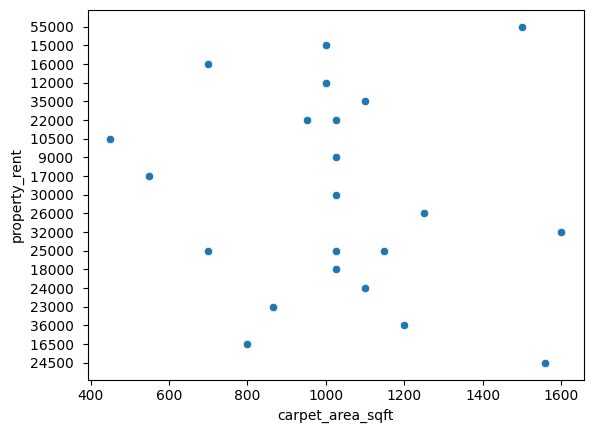

In [398]:
sns.scatterplot(x=data['carpet_area_sqft'], y=data['property_rent'])

In [410]:
data['available_for_bachelor_men'].value_counts()

available_for_bachelor_men
1    15
0    10
Name: count, dtype: int64

In [418]:
data['available_for_bachelor_men'] = data['available_for_bachelor_men'].astype('category')

In [419]:
data['available_for_bachelor_men'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 25 entries, 0 to 24
Series name: available_for_bachelor_men
Non-Null Count  Dtype   
--------------  -----   
25 non-null     category
dtypes: category(1)
memory usage: 277.0 bytes


<Axes: xlabel='available_for_bachelor_men', ylabel='property_rent'>

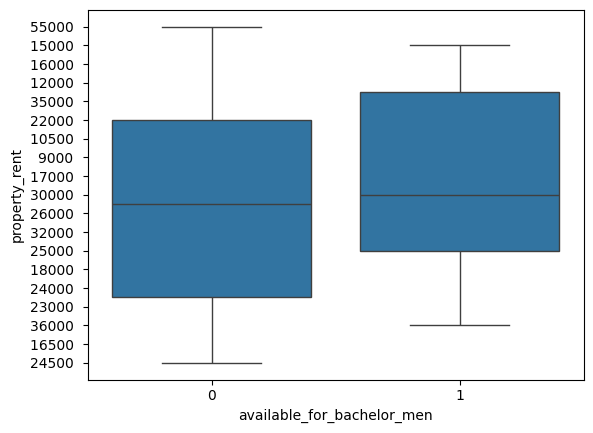

In [422]:
sns.boxplot(x=data['available_for_bachelor_men'], y=data['property_rent'])